### Applying Advanced Transformations (Core)

- Paula Pipkin

I. Clean the files and combine them into one final DataFrame.

This dataframe should have the following columns:
- Hero (Just the name of the Hero)
- Publisher
- Gender
- Eye color
- Race
- Hair color
- Height (numeric)
- Skin color
- Alignment
- Weight (numeric)

Plus, one-hot-encoded columns for every power that appears in the dataset. E.g.:
- Agility
- Flight
- Superspeed
- etc.

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os,json

In [73]:
df1 = pd.read_csv('data/superhero_info - superhero_info.csv')
df1.head(2)

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}"


In [74]:
df2 = pd.read_csv('data/superhero_powers - superhero_powers.csv')
df2.head(2)

,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."


In [75]:
#splitting HERO|Publisher

df1[['Hero','Publisher']] = df1['Hero|Publisher'].str.split('|',expand=True)
df1.drop(columns='Hero|Publisher', inplace=True)
df1.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics
2,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}",Abin Sur,DC Comics
3,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",Abomination,Marvel Comics
4,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}",Absorbing Man,Marvel Comics


In [76]:
#Measurements fixing quote marks, type and splitting

df1['Measurements'] = df1['Measurements'].str.replace("'",'"')

In [77]:
df1['Measurements'] = df1['Measurements'].apply(json.loads)
df1['Measurements'].head(2)

0    {'Height': '203.0 cm', 'Weight': '441.0 kg'}
1     {'Height': '191.0 cm', 'Weight': '65.0 kg'}
Name: Measurements, dtype: object

In [78]:
#checking if transformation to dictionary type worked
tester = df1['Measurements'].loc[0]
type(tester)

dict

In [79]:
measu = df1['Measurements'].apply(pd.Series)
measu.head(4)

,Height,Weight
0,203.0 cm,441.0 kg
1,191.0 cm,65.0 kg
2,185.0 cm,90.0 kg
3,203.0 cm,441.0 kg


In [80]:
df1 = pd.concat((df1, measu), axis=1)
df1.head(3)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher,Height,Weight
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics,203.0 cm,441.0 kg
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics,191.0 cm,65.0 kg
2,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}",Abin Sur,DC Comics,185.0 cm,90.0 kg


In [81]:
df1.drop(columns='Measurements', inplace=True)

In [82]:
df1['Height'] = df1['Height'].str.replace(' cm','', regex=False)
df1['Weight'] = df1['Weight'].str.replace(' kg','', regex=False)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Gender      463 non-null    object
 1   Race        463 non-null    object
 2   Alignment   463 non-null    object
 3   Hair color  463 non-null    object
 4   Eye color   463 non-null    object
 5   Skin color  463 non-null    object
 6   Hero        463 non-null    object
 7   Publisher   463 non-null    object
 8   Height      463 non-null    object
 9   Weight      463 non-null    object
dtypes: object(10)
memory usage: 36.3+ KB


In [83]:
df1 = df1.astype({'Height': 'float64', 'Weight': 'float64'})

In [84]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      463 non-null    object 
 1   Race        463 non-null    object 
 2   Alignment   463 non-null    object 
 3   Hair color  463 non-null    object 
 4   Eye color   463 non-null    object 
 5   Skin color  463 non-null    object 
 6   Hero        463 non-null    object 
 7   Publisher   463 non-null    object 
 8   Height      463 non-null    float64
 9   Weight      463 non-null    float64
dtypes: float64(2), object(8)
memory usage: 36.3+ KB


In [85]:
df1.head(2)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height,Weight
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0,441.0
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0,65.0


In [86]:
#Organizing columns

names = list(df1.columns.values)
names

['Gender',
 'Race',
 'Alignment',
 'Hair color',
 'Eye color',
 'Skin color',
 'Hero',
 'Publisher',
 'Height',
 'Weight']

In [87]:
df1 = df1[['Hero','Publisher','Gender','Eye color',
 'Race','Hair color','Height','Skin color',
 'Alignment','Weight']]
df1.head(2)

,Hero,Publisher,Gender,Eye color,Race,Hair color,Height,Skin color,Alignment,Weight
0,A-Bomb,Marvel Comics,Male,yellow,Human,No Hair,203.0,Unknown,good,441.0
1,Abe Sapien,Dark Horse Comics,Male,blue,Icthyo Sapien,No Hair,191.0,blue,good,65.0


In [88]:
#table 2

df2.head(2)

,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."


In [89]:
print(df2['Powers'].loc[0])
print(type(df2['Powers'].loc[0]))

Agility,Super Strength,Stamina,Super Speed
<class 'str'>


In [90]:
# transforming Powers so I can ohe it
df2['Powers_split'] = df2['Powers'].str.split(",", expand = False)
print(df2['Powers_split'].loc[0])
print(type(df2['Powers_split'].loc[0]))


['Agility', 'Super Strength', 'Stamina', 'Super Speed']
<class 'list'>


In [91]:
df2['Powers_split'].value_counts()

[Intelligence]                                                                                                                                                                                                                                                                          8
[Durability, Super Strength]                                                                                                                                                                                                                                                            5
[Agility, Stealth, Marksmanship, Weapons Master, Stamina]                                                                                                                                                                                                                               4
[Marksmanship]                                                                                                                                            

In [92]:
## exploding the column of lists
exploded = df2.explode('Powers_split')
exploded[['hero_names','Powers','Powers_split']].head(5)

,hero_names,Powers,Powers_split
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Agility
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Super Strength
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Stamina
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Super Speed
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...",Accelerated Healing


In [93]:
## saving the unique values from the exploded column
cols_to_make = exploded['Powers_split'].dropna().unique()
cols_to_make

array(['Agility', 'Super Strength', 'Stamina', 'Super Speed',
       'Accelerated Healing', 'Durability', 'Longevity', 'Camouflage',
       'Self-Sustenance', 'Cold Resistance', 'Underwater breathing',
       'Marksmanship', 'Weapons Master', 'Intelligence', 'Telepathy',
       'Immortality', 'Reflexes', 'Enhanced Sight', 'Sub-Mariner',
       'Lantern Power Ring', 'Invulnerability', 'Animation',
       'Super Breath', 'Dimensional Awareness', 'Flight', 'Size Changing',
       'Teleportation', 'Magic', 'Dimensional Travel',
       'Molecular Manipulation', 'Energy Manipulation', 'Power Cosmic',
       'Energy Absorption', 'Elemental Transmogrification',
       'Fire Resistance', 'Natural Armor', 'Heat Resistance',
       'Matter Absorption', 'Regeneration', 'Stealth', 'Power Suit',
       'Energy Blasts', 'Energy Beams', 'Heat Generation', 'Danger Sense',
       'Phasing', 'Force Fields', 'Hypnokinesis', 'Invisibility',
       'Enhanced Senses', 'Jump', 'Shapeshifting', 'Elasticity',
 

In [94]:
import warnings
warnings.filterwarnings("ignore")

for col in cols_to_make:
    df2[col] = df2['Powers'].str.contains(col)
df2.head()

,hero_names,Powers,Powers_split,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed","[Agility, Super Strength, Stamina, Super Speed]",True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...","[Accelerated Healing, Durability, Longevity, S...",False,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du...","[Agility, Accelerated Healing, Cold Resistance...",True,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,Lantern Power Ring,[Lantern Power Ring],False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt...","[Accelerated Healing, Intelligence, Super Stre...",False,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


#### Merging

In [95]:
merged = pd.merge(df1, df2, left_on='Hero', right_on='hero_names', how='left')
merged.head(3)

,Hero,Publisher,Gender,Eye color,Race,Hair color,Height,Skin color,Alignment,Weight,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,A-Bomb,Marvel Comics,Male,yellow,Human,No Hair,203.0,Unknown,good,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Dark Horse Comics,Male,blue,Icthyo Sapien,No Hair,191.0,blue,good,65.0,...,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,DC Comics,Male,blue,Ungaran,No Hair,185.0,red,good,90.0,...,False,False,False,False,False,False,False,False,False,False


#### II. Use your combined DataFrame to answer the following questions.

- Compare the average weight of super powers who have Super Speed to those who do not.
- What is the average height of heroes for each publisher?

In [101]:
#filter 

to_plot = merged.groupby('Super Speed', as_index=False)['Weight'].mean()
to_plot

,Super Speed,Weight
0,False,101.773585
1,True,129.404040


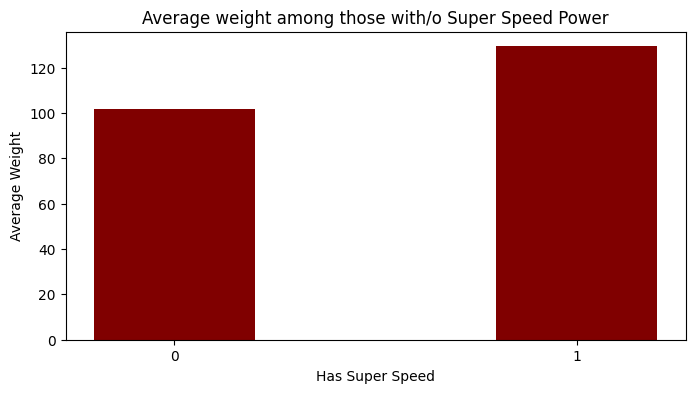

In [111]:
fig = plt.figure(figsize = (8, 4))
 
# creating the bar plot
plt.bar(to_plot['Super Speed'], to_plot['Weight'], color ='maroon',width = 0.4, )

plt.xticks(to_plot['Super Speed']) 
plt.xlabel("Has Super Speed")
plt.ylabel("Average Weight")
plt.title("Average weight among those with/o Super Speed Power")
plt.show()

In [112]:
to_plot = merged.groupby('Publisher', as_index=False)['Height'].mean()
to_plot

,Publisher,Height
0,DC Comics,181.923913
1,Dark Horse Comics,176.909091
2,George Lucas,159.600000
3,Image Comics,211.000000
4,Marvel Comics,191.546128
5,Shueisha,171.500000
6,Star Trek,181.500000
7,Team Epic TV,180.750000
8,Unknown,178.000000


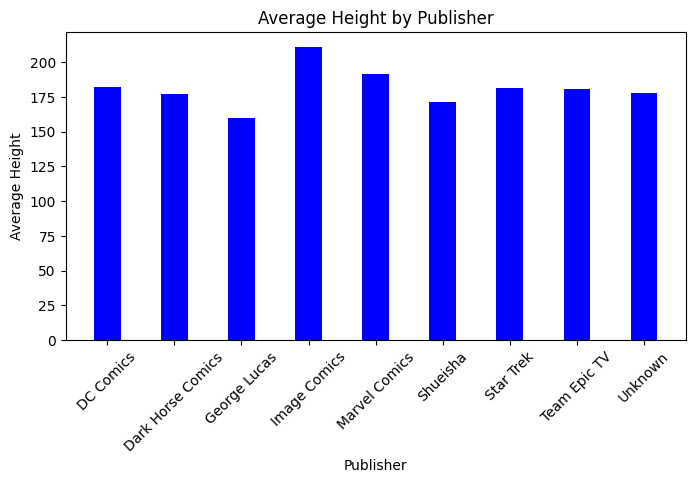

In [114]:
fig = plt.figure(figsize = (8, 4))
 
# creating the bar plot
plt.bar(to_plot['Publisher'], to_plot['Height'], color ='Blue',width = 0.4, )

plt.xticks(to_plot['Publisher'], rotation = 45) 
plt.xlabel("Publisher")
plt.ylabel("Average Height")
plt.title("Average Height by Publisher")
plt.show()